In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras import backend as K

In [3]:
# Number of class

num_classes = 10

In [4]:
batch_size = 64
epoch = 24

In [5]:
# Input data dimention

img_row, img_col = 28, 28

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
x_train = x_train.reshape(x_train.shape[0], img_row, img_col, 1)
x_test = x_test.reshape(x_test.shape[0], img_row, img_col, 1)
input_shape = (img_row, img_col, 1)

In [11]:
input_shape

(28, 28, 1)

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.
x_test /= 255.

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [15]:
# Convert class vectors to binary class matrics (one hot)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [16]:
y_train[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### CNN

In [17]:
# Define the model

model = Sequential()

In [18]:
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epoch,
                 validation_data=(x_test, y_test))

Epoch 1/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7160 - loss: 0.7621 - val_accuracy: 0.8569 - val_loss: 0.3968
Epoch 2/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8685 - loss: 0.3594 - val_accuracy: 0.8756 - val_loss: 0.3454
Epoch 3/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8861 - loss: 0.3093 - val_accuracy: 0.8857 - val_loss: 0.3082
Epoch 4/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8994 - loss: 0.2750 - val_accuracy: 0.8856 - val_loss: 0.3073
Epoch 5/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9092 - loss: 0.2461 - val_accuracy: 0.8935 - val_loss: 0.2957
Epoch 6/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9167 - loss: 0.2221 - val_accuracy: 0.9029 - val_loss: 0.2633
Epoch 7/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9244 - loss: 0.2010 - val_accuracy: 0.8991 - val_loss: 0.2743
Epoch 8/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9284 - loss: 0.1877 - val_accuracy: 0

In [21]:
hist.history

{'accuracy': [0.8008833527565002,
  0.8718000054359436,
  0.8896166682243347,
  0.8995166420936584,
  0.9096166491508484,
  0.9171333312988281,
  0.9233666658401489,
  0.9284833073616028,
  0.9336833357810974,
  0.9402166604995728,
  0.9420499801635742,
  0.9471833109855652,
  0.95128333568573,
  0.9550999999046326,
  0.9576333165168762,
  0.9628666639328003,
  0.9652833342552185,
  0.9677333235740662,
  0.9709833264350891,
  0.9731833338737488,
  0.9744333624839783,
  0.9765833616256714,
  0.9785666465759277,
  0.979283332824707],
 'loss': [0.5385251045227051,
  0.3511731028556824,
  0.30048415064811707,
  0.27105575799942017,
  0.24418368935585022,
  0.22301891446113586,
  0.20501093566417694,
  0.18874092400074005,
  0.17541448771953583,
  0.16231940686702728,
  0.15126769244670868,
  0.13843326270580292,
  0.12979184091091156,
  0.11756256222724915,
  0.11073026806116104,
  0.0990867093205452,
  0.09211501479148865,
  0.08536358922719955,
  0.07821835577487946,
  0.0711003765463829

Test Loss :  0.43577176332473755
Test Accuracy :  0.90829998254776


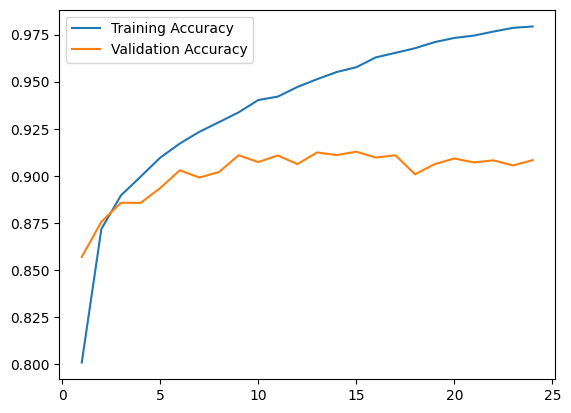

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss : ", score[0])
print("Test Accuracy : ", score[1])

import numpy as np
import matplotlib.pyplot as plt

epoch_list = list(range(1, len(hist.history['accuracy']) + 1))
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

In [23]:
# Summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,008 (1.38 MB)

 Trainable params: 121,002 (472.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,006 (945.34 KB)